In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error


In [3]:
df=pd.read_csv('daily_covid_cases.csv')

In [4]:
# 2(a): Train-test split (65-35)
train_size = int(len(df) * 0.65)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Train AR(5) model
lag = 5
model = AutoReg(train["new_cases"], lags=lag, old_names=False).fit()
coef = model.params
print(f"AR({lag}) Model Coefficients:\n{coef}")

# Make predictions
history = train["new_cases"].values.tolist()
predictions = []
for t in range(len(test)):
    lag_values = history[-lag:]
    # Use iloc to avoid position-based indexing warning
    yhat = coef.iloc[0] + sum(coef.iloc[i+1] * lag_values[lag-i-1] for i in range(lag))
    predictions.append(yhat)
    history.append(test["new_cases"].iloc[t])

# Convert predictions to numpy array for plotting
predictions = np.array(predictions)

# Evaluation metrics
test_rmse = np.sqrt(mean_squared_error(test["new_cases"], predictions))
try:
    test_mape = mean_absolute_percentage_error(test["new_cases"], predictions) * 100
except:
    # Handle cases where actual values might be zero
    test_mape = np.mean(np.abs((test["new_cases"] - predictions) / test["new_cases"].replace(0, 1))) * 100

print(f"\nTest RMSE: {test_rmse:.2f} µg/m³")
print(f"Test MAPE: {test_mape:.2f}%")


AR(5) Model Coefficients:
const           59.954833
new_cases.L1     1.036759
new_cases.L2     0.261712
new_cases.L3     0.027561
new_cases.L4    -0.175392
new_cases.L5    -0.152461
dtype: float64

Test RMSE: 1923.59 µg/m³
Test MAPE: 1.57%


Text(0.5, 1.0, 'Actual vs Predicted Values')

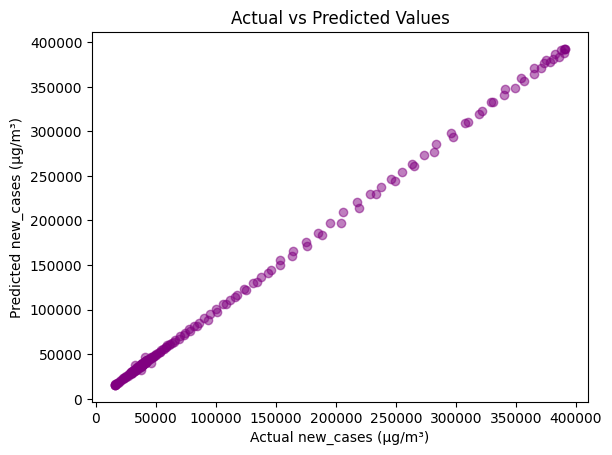

In [6]:
plt.scatter(test["new_cases"], predictions, alpha=0.5, color='purple')

plt.xlabel("Actual new_cases (µg/m³)")
plt.ylabel("Predicted new_cases (µg/m³)")
plt.title("Actual vs Predicted Values")

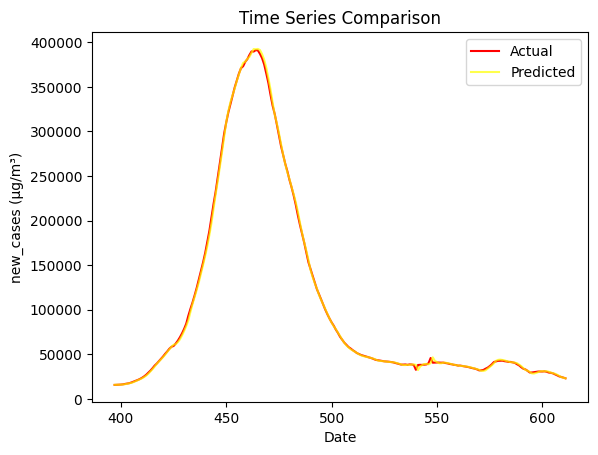

In [9]:
plt.plot(test.index.to_numpy(), test["new_cases"].to_numpy(), label='Actual',color="red")
plt.plot(test.index.to_numpy(), predictions, label='Predicted', alpha=0.7,color="yellow")
plt.xlabel("Date")
plt.ylabel("new_cases (µg/m³)")
plt.title("Time Series Comparison")
plt.legend()